Building the cloud 

The word Cloud was made with the Word Cloud Library

In [5]:
import pickle
import sys
import numpy as np
import scipy
from sklearn.feature_selection import SelectKBest, SelectFpr
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

train_data = pd.read_csv('recipe_train.csv')
num_steps = train_data.n_steps
num_ingr = train_data.n_ingredients
y_data = train_data.duration_label

FileNotFoundError: [Errno 2] No such file or directory: 'recipe_train.csv'

/home/robert/.local/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


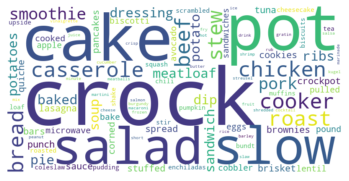

In [52]:
vocab = pickle.load(open("recipe_text_features_countvec/train_name_countvectorizer.pkl", "rb"))
vocab_dict = vocab.vocabulary_
inv_map = {v: k for k, v in vocab_dict.items()}

train_name = scipy.sparse.load_npz('recipe_text_features_countvec/train_name_vec.npz')

y_train, y_test, name_train, name_test = train_test_split(y_data, train_name)

clf = SelectFpr(chi2, alpha=0.001)
name_t_train = clf.fit_transform(name_train, y_train)
name_t_test = clf.transform(name_test)
inter = clf.get_support(indices=True)
clf = SelectKBest(mutual_info_classif, k=100)
name_t_train = clf.fit_transform(name_t_train, y_train)
name_t_test = clf.transform(name_t_test)

MI = mutual_info_classif(name_t_train, y_train)


support = clf.get_support(indices=True)

indecies = ''
while(len(MI)):
    next = np.argmax(MI)
    indecies += ' ' + inv_map[inter[support[next]]] + ' '
    MI = np.delete(MI, next, 0)
    support = np.delete(support, next, 0)



cloud = WordCloud(background_color='white', width=800, height=400, relative_scaling=0, normalize_plurals=False)
cloud.generate(indecies)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Cloud Name.png', bbox_inches='tight', dpi=150)
plt.show()

/home/robert/.local/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


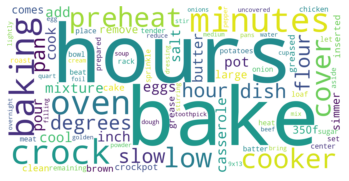

In [53]:
train_steps = scipy.sparse.load_npz('recipe_text_features_countvec/train_steps_vec.npz')

vocab = pickle.load(open("recipe_text_features_countvec/train_steps_countvectorizer.pkl", "rb"))
vocab_dict = vocab.vocabulary_
inv_map = {v: k for k, v in vocab_dict.items()}

y_train, y_test, steps_train, steps_test = train_test_split(y_data, train_steps)

clf = SelectFpr(chi2, alpha=0.001)
steps_t_train = clf.fit_transform(steps_train, y_train)
steps_t_test = clf.transform(steps_test)
inter = clf.get_support(indices=True)
clf = SelectKBest(mutual_info_classif, k=100)
steps_t_train = clf.fit_transform(steps_t_train, y_train)
steps_t_test = clf.transform(steps_t_test)

MI = mutual_info_classif(steps_t_train, y_train)


support = clf.get_support(indices=True)

indecies = ''
while(len(MI)):
    next = np.argmax(MI)
    indecies += ' ' + inv_map[inter[support[next]]] + ' '
    MI = np.delete(MI, next, 0)
    support = np.delete(support, next, 0)



cloud = WordCloud(background_color='white', width=1600, height=800, relative_scaling=0, normalize_plurals=False)
cloud.generate(indecies)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Cloud Steps.png', bbox_inches='tight', dpi=150)
plt.show()

/home/robert/.local/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


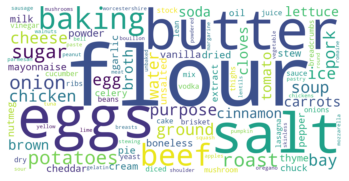

In [54]:
train_ingr = scipy.sparse.load_npz('recipe_text_features_countvec/train_ingr_vec.npz')

vocab = pickle.load(open("recipe_text_features_countvec/train_ingr_countvectorizer.pkl", "rb"))
vocab_dict = vocab.vocabulary_
inv_map = {v: k for k, v in vocab_dict.items()}

y_train, y_test, ingr_train, ingr_test = train_test_split(y_data, train_ingr)

clf = SelectFpr(chi2, alpha=0.001)
ingr_t_train = clf.fit_transform(ingr_train, y_train)
ingr_t_test = clf.transform(ingr_test)
inter = clf.get_support(indices=True)
clf = SelectKBest(mutual_info_classif, k=100)
ingr_t_train = clf.fit_transform(ingr_t_train, y_train)
ingr_t_test = clf.transform(ingr_t_test)

MI = mutual_info_classif(ingr_t_train, y_train)


support = clf.get_support(indices=True)

indecies = ''
while(len(MI)):
    next = np.argmax(MI)
    indecies += ' ' + inv_map[inter[support[next]]] + ' '
    MI = np.delete(MI, next, 0)
    support = np.delete(support, next, 0)



cloud = WordCloud(background_color='white', width=1600, height=800, relative_scaling=0, normalize_plurals=False)
cloud.generate(indecies)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Cloud Ingredients.png', bbox_inches='tight', dpi=150)
plt.show()

Model 1

In [33]:
import pickle
from sklearn import svm
import scipy
import numpy as np
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectFpr
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import KernelPCA
from sklearn.feature_extraction import text

In [34]:
np.set_printoptions(threshold=sys.maxsize)

train_name = scipy.sparse.load_npz('recipe_text_features_countvec/train_name_vec.npz')
test_name = scipy.sparse.load_npz('recipe_text_features_countvec/test_name_vec.npz')

train_steps = scipy.sparse.load_npz('recipe_text_features_countvec/train_steps_vec.npz')
test_steps = scipy.sparse.load_npz('recipe_text_features_countvec/test_steps_vec.npz')

train_ingredients = scipy.sparse.load_npz('recipe_text_features_countvec/train_ingr_vec.npz')
test_ingredients = scipy.sparse.load_npz('recipe_text_features_countvec/test_ingr_vec.npz')

doc2vec50_train_name = np.genfromtxt('recipe_text_features_doc2vec50/train_name_doc2vec50.csv', delimiter=",")
doc2vec50_train_steps = np.genfromtxt('recipe_text_features_doc2vec50/train_steps_doc2vec50.csv', delimiter=",")
doc2vec50_train_ingr = np.genfromtxt('recipe_text_features_doc2vec50/train_ingr_doc2vec50.csv', delimiter=",")

doc2vec50_test_name = np.genfromtxt('recipe_text_features_doc2vec50/test_name_doc2vec50.csv', delimiter=",")
doc2vec50_test_steps = np.genfromtxt('recipe_text_features_doc2vec50/test_steps_doc2vec50.csv', delimiter=",")
doc2vec50_test_ingr = np.genfromtxt('recipe_text_features_doc2vec50/test_ingr_doc2vec50.csv', delimiter=",")

doc2vec100_train_name = np.genfromtxt('recipe_text_features_doc2vec100/train_name_doc2vec100.csv', delimiter=",")
doc2vec100_train_steps = np.genfromtxt('recipe_text_features_doc2vec100/train_steps_doc2vec100.csv', delimiter=",")
doc2vec100_train_ingr = np.genfromtxt('recipe_text_features_doc2vec100/train_ingr_doc2vec100.csv', delimiter=",")

doc2vec100_test_name = np.genfromtxt('recipe_text_features_doc2vec100/test_name_doc2vec100.csv', delimiter=",")
doc2vec100_test_steps = np.genfromtxt('recipe_text_features_doc2vec100/test_steps_doc2vec100.csv', delimiter=",")
doc2vec100_test_ingr = np.genfromtxt('recipe_text_features_doc2vec100/test_ingr_doc2vec100.csv', delimiter=",")


train_data = pd.read_csv('recipe_train.csv')
train_num_steps = train_data.n_steps
train_num_ingr = train_data.n_ingredients
train_y_data = train_data.duration_label

test_data = pd.read_csv('recipe_test.csv')
test_num_steps = test_data.n_steps
test_num_ingr = test_data.n_ingredients

In [35]:
vocab_name = text.CountVectorizer(stop_words="english").fit(train_data.name)
vocab_steps = text.CountVectorizer(stop_words="english").fit(train_data.steps)
vocab_ingredients = text.CountVectorizer(stop_words="english").fit(train_data.ingredients)
print("Start Transformation")
x_train_name = vocab_name.transform(train_data.name)
x_train_steps = vocab_steps.transform(train_data.steps)
x_train_ingredients = vocab_ingredients.transform(train_data.ingredients)

x_test_name = vocab_name.transform(test_data.name)
x_test_steps = vocab_steps.transform(test_data.steps)
x_test_ingredients = vocab_ingredients.transform(test_data.ingredients)
print("End Transformation")

train_y_data = train_data.duration_label

Start Transformation
End Transformation


In [36]:
doc_combined_train = np.hstack((doc2vec50_train_name, doc2vec50_train_steps, doc2vec50_train_ingr, \
                              doc2vec100_train_name, doc2vec100_train_steps, doc2vec100_train_ingr))
doc_combined_test = np.hstack((doc2vec50_test_name, doc2vec50_test_steps, doc2vec50_test_ingr, \
                             doc2vec100_test_name, doc2vec100_test_steps, doc2vec100_test_ingr))

In [37]:
model = RandomForestClassifier(n_jobs=-1, verbose=True,  n_estimators=1000)
model.fit(doc_combined_train, train_y_data)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   42.0s finished


RandomForestClassifier(n_estimators=1000, n_jobs=-1, verbose=True)

In [38]:
doc2vec_train_predict = model.predict(doc_combined_train)
doc2vec_test_predict = model.predict(doc_combined_test)

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.2s
[Parallel(n_jobs=24)]: Done 402 tasks      | elapsed:    0.6s
[Parallel(n_jobs=24)]: Done 752 tasks      | elapsed:    1.1s
[Parallel(n_jobs=24)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 402 tasks      | elapsed:    0.2s
[Parallel(n_jobs=24)]: Done 752 tasks      | elapsed:    0.3s
[Parallel(n_jobs=24)]: Done 1000 out of 1000 | elapsed:    0.4s finished


In [39]:
clf = SelectFpr(chi2, alpha=0.05)
name_t_train = clf.fit_transform(x_train_name, train_y_data)
name_t_test = clf.transform(x_test_name)
clf = SelectKBest(mutual_info_classif, k=100)
name_t_train = clf.fit_transform(name_t_train, train_y_data)
name_t_test = clf.transform(name_t_test)

In [40]:
clf = SelectFpr(chi2, alpha=0.05)
steps_t_train = clf.fit_transform(x_train_steps, train_y_data)
steps_t_test = clf.transform(x_test_steps)
clf = SelectKBest(mutual_info_classif, k=150)
steps_t_train = clf.fit_transform(steps_t_train, train_y_data)
steps_t_test = clf.transform(steps_t_test)

In [41]:
clf = SelectFpr(chi2, alpha=0.05)
ingr_t_train = clf.fit_transform(x_train_ingredients, train_y_data)
ingr_t_test = clf.transform(x_test_ingredients)
clf = SelectKBest(mutual_info_classif, k=100)
ingr_t_train = clf.fit_transform(ingr_t_train, train_y_data)
ingr_t_test = clf.transform(ingr_t_test)

In [42]:
num_combined_train = np.transpose(np.stack((train_data.n_steps, train_data.n_ingredients)))
num_combined_test = np.transpose(np.stack((test_data.n_steps, test_data.n_ingredients)))

In [43]:
train_vec = scipy.sparse.hstack((name_t_train, steps_t_train, ingr_t_train, doc2vec_train_predict.reshape(40000, 1), num_combined_train))
test_vec = scipy.sparse.hstack((name_t_test, steps_t_test, ingr_t_test, doc2vec_test_predict.reshape(10000, 1), num_combined_test))

In [44]:
model1 = RandomForestClassifier(n_jobs=-1, n_estimators=1000, verbose=True)
model1.fit(train_vec, train_y_data)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   12.9s finished


RandomForestClassifier(n_estimators=1000, n_jobs=-1, verbose=True)

In [45]:
model1_predictions = model1.predict(test_vec)
model1_predictions = pd.DataFrame(model1_predictions)
model1_predictions.index += 1
model1_predictions.to_csv("Model1.csv")

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 402 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 752 tasks      | elapsed:    0.2s
[Parallel(n_jobs=24)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Model 1. Without the doc2vec infomation which performed poorly.

In [46]:
train_vec = scipy.sparse.hstack((name_t_train, steps_t_train, ingr_t_train))#,  num_combined_train
test_vec = scipy.sparse.hstack((name_t_test, steps_t_test, ingr_t_test))#, num_combined_test

In [47]:
clf = SelectFpr(chi2, alpha=0.05)
train_vec = clf.fit_transform(train_vec, train_y_data)
test_vec = clf.transform(test_vec)

In [48]:
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

model2 = CatBoostClassifier(depth=8)
model2.fit(train_vec, train_y_data)

Learning rate set to 0.095505
0:	learn: 1.0168697	total: 27.1ms	remaining: 27s
1:	learn: 0.9501032	total: 52.5ms	remaining: 26.2s
2:	learn: 0.8949113	total: 78.8ms	remaining: 26.2s
3:	learn: 0.8497912	total: 107ms	remaining: 26.8s
4:	learn: 0.8102217	total: 133ms	remaining: 26.5s
5:	learn: 0.7755154	total: 159ms	remaining: 26.3s
6:	learn: 0.7466650	total: 184ms	remaining: 26.1s
7:	learn: 0.7207575	total: 211ms	remaining: 26.2s
8:	learn: 0.6997571	total: 242ms	remaining: 26.7s
9:	learn: 0.6783979	total: 269ms	remaining: 26.6s
10:	learn: 0.6586618	total: 296ms	remaining: 26.6s
11:	learn: 0.6417975	total: 323ms	remaining: 26.6s
12:	learn: 0.6274441	total: 349ms	remaining: 26.5s
13:	learn: 0.6121975	total: 374ms	remaining: 26.4s
14:	learn: 0.6012396	total: 400ms	remaining: 26.3s
15:	learn: 0.5890972	total: 426ms	remaining: 26.2s
16:	learn: 0.5785948	total: 457ms	remaining: 26.4s
17:	learn: 0.5699387	total: 483ms	remaining: 26.4s
18:	learn: 0.5630803	total: 510ms	remaining: 26.3s
19:	learn:

In [50]:
model2_predictions = model2.predict(test_vec)
model2_predictions = pd.DataFrame(model2_predictions)
model2_predictions.index += 1
model2_predictions.to_csv("Model2.csv")

Model 3

In [16]:

train_data['first_y'] = train_data['duration_label'].replace(3.0, 2.0)
train_data['second_y'] = train_data['duration_label'].replace(1.0, 2.0)
train_1 = train_data['first_y']
train_2 = train_data['second_y']



In [36]:
train_vec = scipy.sparse.hstack((name_t_train, steps_t_train, ingr_t_train,  num_combined_train))
test_vec = scipy.sparse.hstack((name_t_test, steps_t_test, ingr_t_test, num_combined_test))

In [19]:
clf = SelectFpr(chi2, alpha=0.05)
train_vec = clf.fit_transform(train_vec, train_1)
test_vec = clf.transform(test_vec)

In [20]:
oneVsAll = CatBoostClassifier(depth=8)
oneVsAll.fit(train_vec, train_1)

Learning rate set to 0.049775
0:	learn: 0.6685405	total: 14.6ms	remaining: 14.6s
1:	learn: 0.6468257	total: 28.5ms	remaining: 14.2s
2:	learn: 0.6294219	total: 42.7ms	remaining: 14.2s
3:	learn: 0.6133356	total: 56.9ms	remaining: 14.2s
4:	learn: 0.5972243	total: 70.9ms	remaining: 14.1s
5:	learn: 0.5844795	total: 85.8ms	remaining: 14.2s
6:	learn: 0.5712394	total: 100ms	remaining: 14.2s
7:	learn: 0.5610259	total: 114ms	remaining: 14.2s
8:	learn: 0.5500974	total: 129ms	remaining: 14.2s
9:	learn: 0.5405446	total: 142ms	remaining: 14.1s
10:	learn: 0.5323143	total: 156ms	remaining: 14.1s
11:	learn: 0.5245184	total: 170ms	remaining: 14s
12:	learn: 0.5169360	total: 184ms	remaining: 14s
13:	learn: 0.5098131	total: 197ms	remaining: 13.9s
14:	learn: 0.5040322	total: 211ms	remaining: 13.9s
15:	learn: 0.4978546	total: 225ms	remaining: 13.8s
16:	learn: 0.4920279	total: 241ms	remaining: 14s
17:	learn: 0.4870750	total: 254ms	remaining: 13.9s
18:	learn: 0.4824464	total: 268ms	remaining: 13.8s
19:	learn: 

In [21]:
preds_1 = oneVsAll.predict(test_vec)

In [22]:
clf = SelectFpr(chi2, alpha=0.05)
train_vec = clf.fit_transform(train_vec, train_2)
test_vec = clf.transform(test_vec)

In [23]:
threeVsAll = CatBoostClassifier(depth=8)
threeVsAll.fit(train_vec, train_2)

Learning rate set to 0.049775
0:	learn: 0.5898987	total: 11.7ms	remaining: 11.7s
1:	learn: 0.5045521	total: 23.1ms	remaining: 11.5s
2:	learn: 0.4333667	total: 33.6ms	remaining: 11.2s
3:	learn: 0.3745775	total: 43.9ms	remaining: 10.9s
4:	learn: 0.3259041	total: 54.5ms	remaining: 10.9s
5:	learn: 0.2967032	total: 64.8ms	remaining: 10.7s
6:	learn: 0.2694328	total: 74.8ms	remaining: 10.6s
7:	learn: 0.2402577	total: 85.1ms	remaining: 10.6s
8:	learn: 0.2228603	total: 94.4ms	remaining: 10.4s
9:	learn: 0.2078320	total: 105ms	remaining: 10.3s
10:	learn: 0.1881764	total: 116ms	remaining: 10.4s
11:	learn: 0.1772215	total: 126ms	remaining: 10.4s
12:	learn: 0.1629796	total: 137ms	remaining: 10.4s
13:	learn: 0.1516561	total: 149ms	remaining: 10.5s
14:	learn: 0.1437826	total: 159ms	remaining: 10.4s
15:	learn: 0.1376636	total: 170ms	remaining: 10.4s
16:	learn: 0.1297498	total: 182ms	remaining: 10.5s
17:	learn: 0.1255369	total: 192ms	remaining: 10.5s
18:	learn: 0.1186924	total: 204ms	remaining: 10.5s
19

In [24]:
preds_2 = threeVsAll.predict(test_vec)

Combine the two classifiers

In [25]:
ans = []
for i, j in zip(preds_1, preds_2):
    if i ==1 and j == 3:
        ans.append(2.0)
    elif i == 1:
        ans.append(1.0)
    elif j == 3:
        ans.append(3.0)
    else:
        ans.append(2.0)
ans

[2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 3.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 3.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0

In [26]:
model3 = pd.DataFrame(ans)
model3.index += 1
model3.to_csv("Model3.csv")